# Declaration of Originality

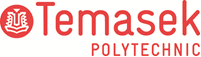

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Chow Willy
* Tutorial Group                : PC07
* Tutor						    : Ester Goh
* Submission Date               : soon


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option("display.max_columns", 200)


# 1. Business Understanding
Goal: Steam releases a large number of games every year, making it difficult for developers and publishers to anticipate which titles will gain strong player traction. Without a way to estimate popularity early, teams may misallocate marketing budgets, choose ineffective pricing, or release at suboptimal times.


# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv("a_steam_data_2021_2025.csv")  # change path if needed

print("Dataset shape (rows, cols):", df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())    

Dataset shape (rows, cols): (65521, 10)


,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues



Columns: ['appid', 'name', 'release_year', 'release_date', 'genres', 'categories', 'price', 'recommendations', 'developer', 'publisher']


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
print("Data types:")
display(df.dtypes)

print("\nUnique values per column:")
display(df.nunique().sort_values(ascending=False))

Data types:


appid                int64
name                object
release_year         int64
release_date        object
genres              object
categories          object
price              float64
recommendations      int64
developer           object
publisher           object
dtype: object


Unique values per column:


appid              65521
name               65128
developer          45679
publisher          41600
categories          7993
recommendations     2536
release_date        1828
genres              1723
price                589
release_year           5
dtype: int64

In [4]:
## Check for missing data
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_count / len(df) * 100).round(2)

display(pd.DataFrame({
    "missing_count": missing_count,
    "missing_%": missing_pct    
}))


,missing_count,missing_%
publisher,183,0.28
genres,66,0.10
developer,53,0.08
categories,7,0.01
appid,0,0.00
name,0,0.00
release_year,0,0.00
release_date,0,0.00
price,0,0.00
recommendations,0,0.00


In [5]:
## Describe data distribution
display(df.describe(include="all"))

print("\nBasic checks:")
print("Duplicates:", df.duplicated().sum())
print("% free games (price==0):", (df["price"] == 0).mean().round(4))
print("% games with 0 recommendations:", (df["recommendations"] == 0).mean().round(4))

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
count,6.552100e+04,65521,65521.000000,65521,65455,65514,65521.000000,65521.000000,65468,65338
unique,NaN,65128,NaN,1828,1723,7993,NaN,NaN,45679,41600
top,NaN,Zombie Hunter,NaN,2025,Casual;Indie,Single-player;Family Sharing,NaN,NaN,EroticGamesClub,EroticGamesClub
freq,NaN,5,NaN,836,4136,15071,NaN,NaN,215,215
mean,2.580607e+06,NaN,2023.453091,NaN,NaN,NaN,7.204043,362.165336,NaN,NaN
std,7.692480e+05,NaN,1.386641,NaN,NaN,NaN,16.914429,6936.837198,NaN,NaN
min,1.200220e+06,NaN,2021.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1.916970e+06,NaN,2022.000000,NaN,NaN,NaN,0.990000,0.000000,NaN,NaN
50%,2.516050e+06,NaN,2024.000000,NaN,NaN,NaN,3.990000,0.000000,NaN,NaN
75%,3.193800e+06,NaN,2025.000000,NaN,NaN,NaN,9.740000,0.000000,NaN,NaN



Basic checks:
Duplicates: 0
% free games (price==0): 0.1826
% games with 0 recommendations: 0.8778


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

,recommendations
count,65521.000000
mean,362.165336
std,6936.837198
min,0.000000
50%,0.000000
75%,0.000000
90%,145.000000
95%,476.000000
99%,4664.000000
max,862487.000000


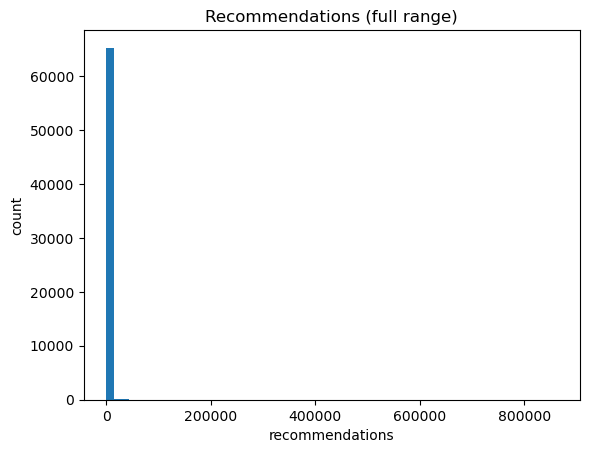

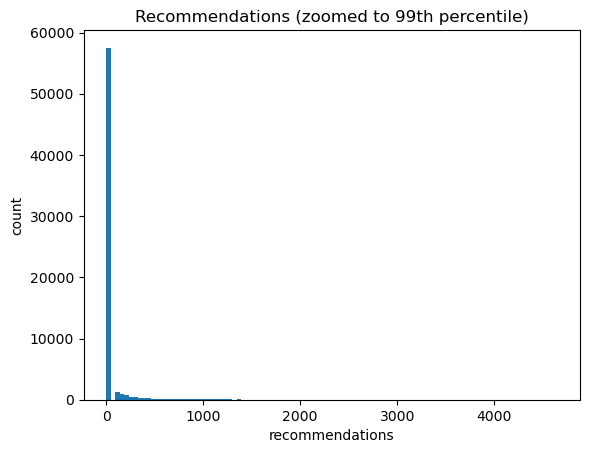

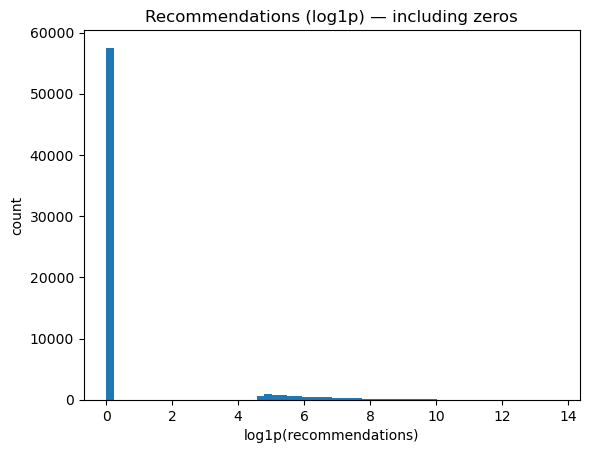

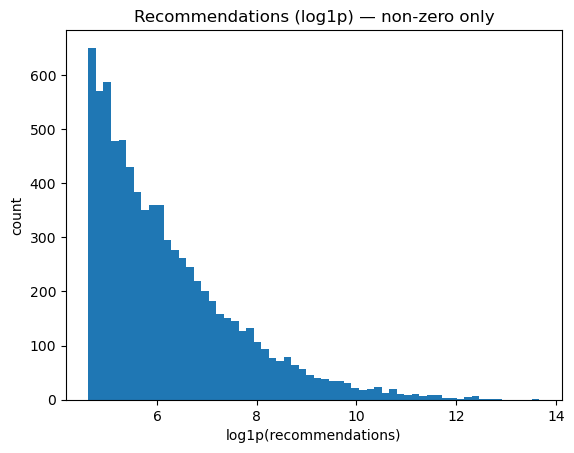

In [34]:
# Understanding distribution of target (recommendations)
rec = df["recommendations"].dropna()

# Summary statistics (super important for skew explanation)
target_summary = rec.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]).to_frame("recommendations")
target_summary.loc["%_zero"] = rec.eq(0).mean() * 100
display(target_summary)

# 1) Full histogram (shows long tail / outliers exist)
plt.figure()
plt.hist(rec, bins=60)
plt.title("Recommendations (full range)")
plt.xlabel("recommendations")
plt.ylabel("count")
plt.show()

# 2) Zoomed to 99th percentile (more informative than 95% for Steam)
upper = rec.quantile(0.99)
plt.figure()
plt.hist(rec[rec <= upper], bins=100)
plt.title("Recommendations (zoomed to 99th percentile)")
plt.xlabel("recommendations")
plt.ylabel("count")
plt.show()

# 3) Log scale (best for modelling + readability)
plt.figure()
plt.hist(np.log1p(rec), bins=60)
plt.title("Recommendations (log1p) — including zeros")
plt.xlabel("log1p(recommendations)")
plt.ylabel("count")
plt.show()

# 4) Log scale for non-zero only (shows distribution of engaged games)
rec_nz = rec[rec > 0]
plt.figure()
plt.hist(np.log1p(rec_nz), bins=60)
plt.title("Recommendations (log1p) — non-zero only")
plt.xlabel("log1p(recommendations)")
plt.ylabel("count")
plt.show()



### 2.3.1.2 Understanding distribution of features

,price
count,65521.000000
mean,7.204043
std,16.914429
min,0.000000
50%,3.990000
75%,9.740000
90%,14.990000
95%,19.990000
99%,49.990000
max,1900.000000


% free games (price==0): 18.26%


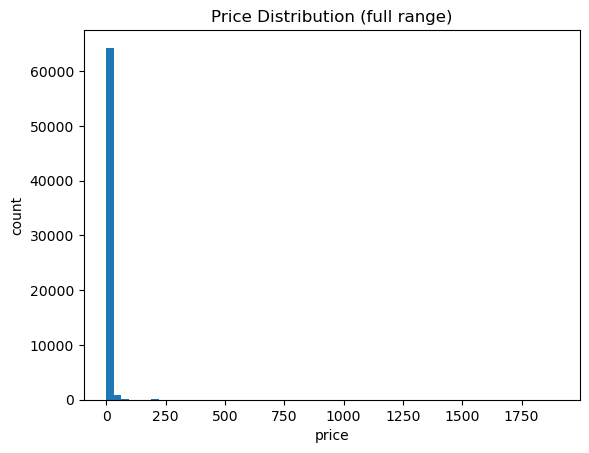

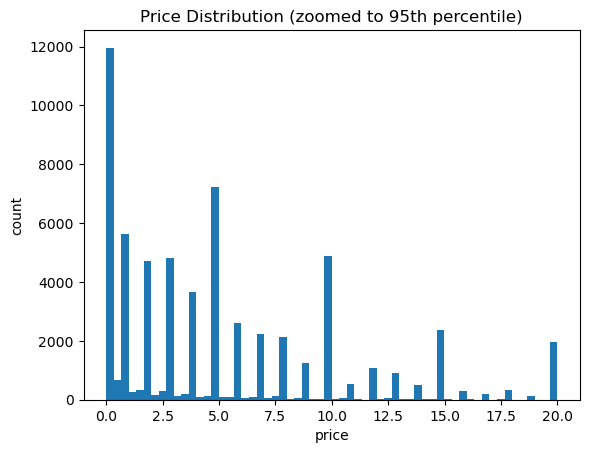

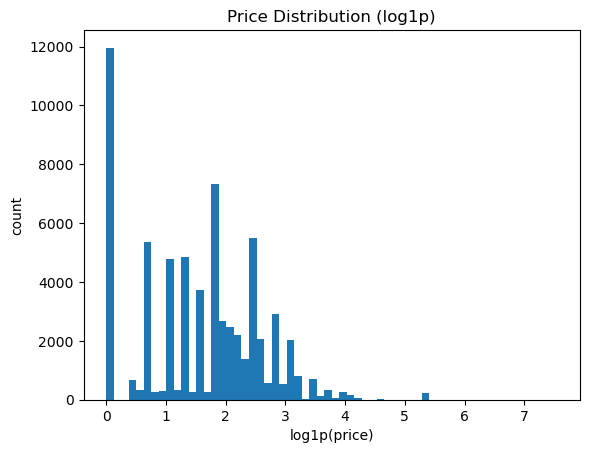

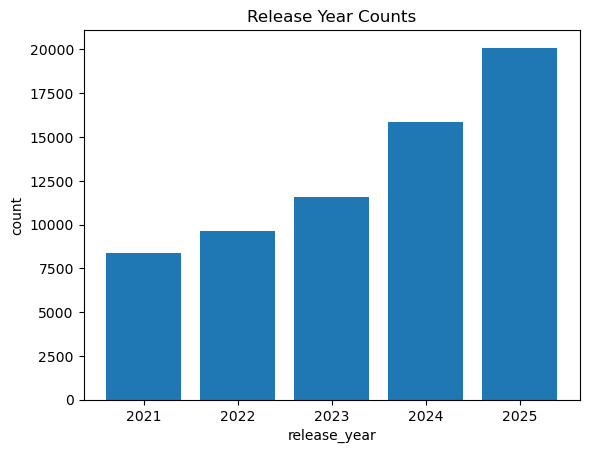

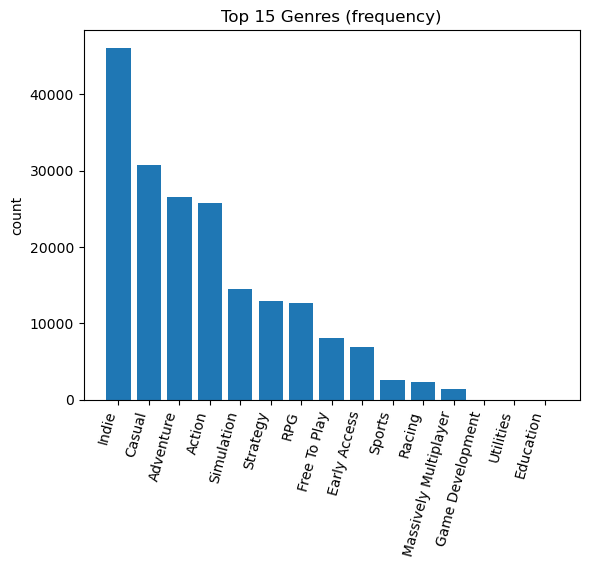

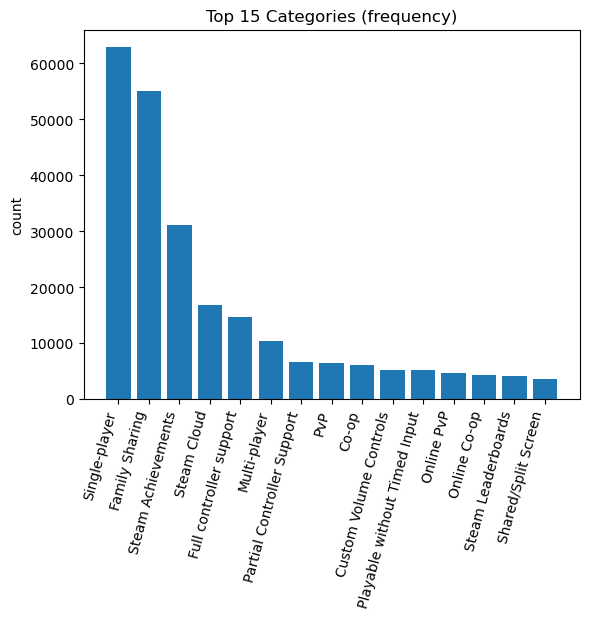

In [32]:
## Understanding distribution of features

# Price distribution (better views)
price = df["price"].dropna()

# Summary numbers (helps explanation)
display(price.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]).to_frame("price"))
print(f"% free games (price==0): {(price.eq(0).mean()*100):.2f}%")

# 1) Full histogram (shows outliers exist)
plt.figure()
plt.hist(price, bins=60)
plt.title("Price Distribution (full range)")
plt.xlabel("price")
plt.ylabel("count")
plt.show()

# 2) Zoomed to 95th percentile (shows typical price range)
upper_p = price.quantile(0.95)
plt.figure()
plt.hist(price[price <= upper_p], bins=60)
plt.title("Price Distribution (zoomed to 95th percentile)")
plt.xlabel("price")
plt.ylabel("count")
plt.show()

# 3) Log scale (compresses outliers without removing them)
plt.figure()
plt.hist(np.log1p(price), bins=60)
plt.title("Price Distribution (log1p)")
plt.xlabel("log1p(price)")
plt.ylabel("count")
plt.show()


# Release year distribution
year_counts = df["release_year"].value_counts().sort_index()
plt.figure()
plt.bar(year_counts.index.astype(str), year_counts.values)
plt.title("Release Year Counts")
plt.xlabel("release_year")
plt.ylabel("count")
plt.show()

# Top genres
genres_flat = df["genres"].fillna("").str.split(";").explode().str.strip()
genres_flat = genres_flat[genres_flat != ""]
top_genres = genres_flat.value_counts().head(15)

plt.figure()
plt.bar(top_genres.index, top_genres.values)
plt.title("Top 15 Genres (frequency)")
plt.xticks(rotation=75, ha="right")
plt.ylabel("count")
plt.show()

# Top categories
cats_flat = df["categories"].fillna("").str.split(";").explode().str.strip()
cats_flat = cats_flat[cats_flat != ""]
top_cats = cats_flat.value_counts().head(15)

plt.figure()
plt.bar(top_cats.index, top_cats.values)
plt.title("Top 15 Categories (frequency)")
plt.xticks(rotation=75, ha="right")
plt.ylabel("count")
plt.show()


### 2.3.2 Understanding relationship between variables

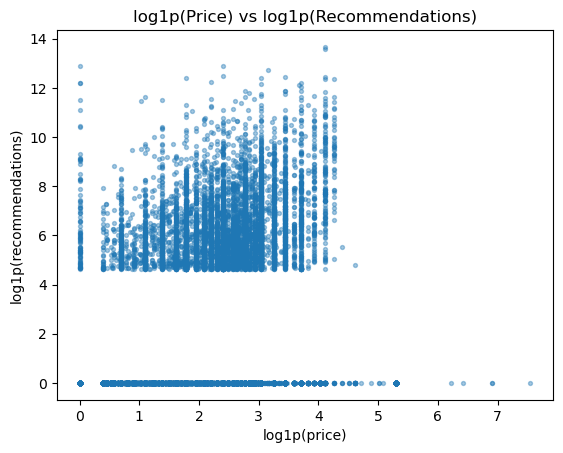

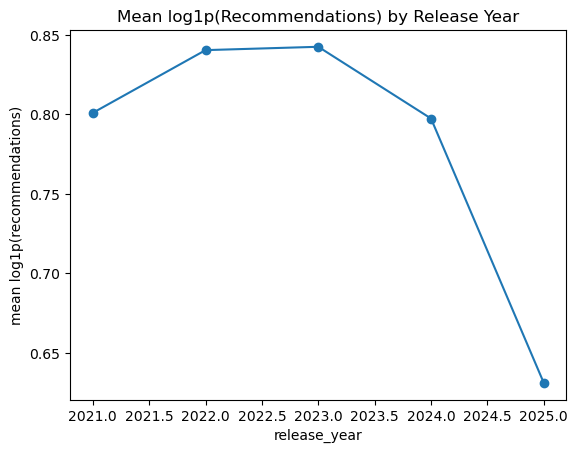

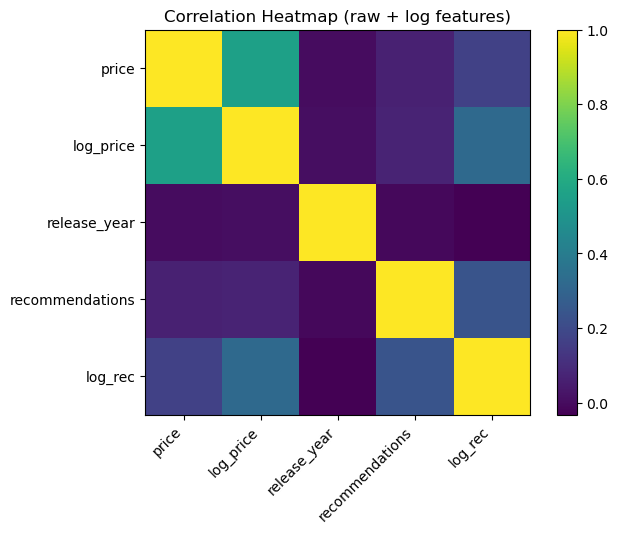

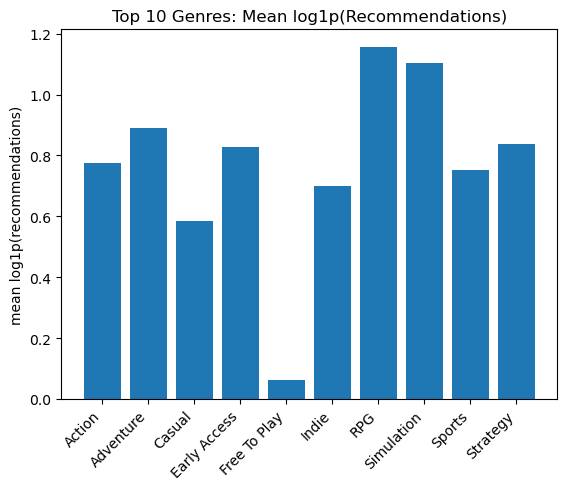

In [30]:
## Understanding relationship between variables

# Price vs log recommendations
plt.figure()
plt.scatter(np.log1p(df["price"]), np.log1p(df["recommendations"]), s=8, alpha=0.4)
plt.title("log1p(Price) vs log1p(Recommendations)")
plt.xlabel("log1p(price)")
plt.ylabel("log1p(recommendations)")
plt.show()

# Median popularity by release_year
tmp = df.groupby("release_year")["recommendations"].apply(lambda s: np.log1p(s).mean()).sort_index()
plt.figure()
plt.plot(tmp.index, tmp.values, marker="o")
plt.title("Mean log1p(Recommendations) by Release Year")
plt.xlabel("release_year")
plt.ylabel("mean log1p(recommendations)")
plt.show()

# Numeric correlation
tmp = df[["price", "release_year", "recommendations"]].copy()
tmp["log_price"] = np.log1p(tmp["price"])
tmp["log_rec"] = np.log1p(tmp["recommendations"])

corr = tmp[["price","log_price","release_year","recommendations","log_rec"]].corr(numeric_only=True)

plt.figure(figsize=(7,5))
plt.imshow(corr.values)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap (raw + log features)")
plt.colorbar()
plt.show()


# Top genres by mean log recommendations
genres = df[["genres", "recommendations"]].copy()
genres["genre"] = genres["genres"].fillna("").str.split(";")
genres = genres.explode("genre")
genres["genre"] = genres["genre"].str.strip()
genres = genres[genres["genre"] != ""]

top10 = genres["genre"].value_counts().head(10).index
genre_mean = genres[genres["genre"].isin(top10)].groupby("genre")["recommendations"].apply(lambda s: np.log1p(s).mean())

plt.figure()
plt.bar(genre_mean.index, genre_mean.values)
plt.title("Top 10 Genres: Mean log1p(Recommendations)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("mean log1p(recommendations)")
plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [23]:
## Clean data
df = df.copy()

# 1) Basic cleanup
for col in ["genres", "categories", "developer", "publisher", "release_date", "name"]:
    df[col] = df[col].fillna("").astype(str).str.strip()

df["price"] = pd.to_numeric(df["price"], errors="coerce").fillna(0)
df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce").fillna(df["release_year"].mode()[0]).astype(int)

# 2) Parse release_date (fast, vectorized)
raw = df["release_date"]
dt_full = pd.to_datetime(raw, errors="coerce")  # handles "Jul 5, 2024"

# year-only like "2025"
mask_year = raw.str.fullmatch(r"\d{4}")
dt_full.loc[mask_year] = pd.to_datetime(raw[mask_year] + "-01-01", errors="coerce")

# quarter like "Q4 2025"
mask_q = raw.str.match(r"^Q[1-4]\s+\d{4}$")
if mask_q.any():
    q = raw[mask_q].str.extract(r"^Q([1-4])\s+(\d{4})$")
    q_num = q[0].astype(int)
    y_num = q[1].astype(int)
    q_month = q_num.map({1: 1, 2: 4, 3: 7, 4: 10})
    dt_full.loc[mask_q] = pd.to_datetime(
        y_num.astype(str) + "-" + q_month.astype(str).str.zfill(2) + "-01",
        errors="coerce"
    )

# month year like "December 2025"
mask_my = raw.str.match(r"^[A-Za-z]+\s+\d{4}$")
dt_full.loc[mask_my] = pd.to_datetime(raw[mask_my], errors="coerce")

# fallback: use release_year Jan 1
mask_na = dt_full.isna()
dt_full.loc[mask_na] = pd.to_datetime(df.loc[mask_na, "release_year"].astype(str) + "-01-01", errors="coerce")

df["release_dt"] = dt_full
df["release_month"] = df["release_dt"].dt.month
df["release_dayofweek"] = df["release_dt"].dt.dayofweek

# mark partial/non-standard dates (anything not parseable as full date originally)
df["is_partial_date"] = pd.to_datetime(raw, errors="coerce").isna().astype(int)

# 3) Cap high-cardinality categoricals (keeps future OHE manageable)
def cap_top_k(series, k=200):
    top = series.value_counts().nlargest(k).index
    return series.where(series.isin(top), other="Other")

df["developer"] = cap_top_k(df["developer"], k=200)
df["publisher"] = cap_top_k(df["publisher"], k=200)

# 4) Multi-label columns -> binary flags (Top labels only)
def slugify(s: str) -> str:
    s = re.sub(r"[^A-Za-z0-9]+", "_", s.strip())
    return s.strip("_").lower()

# top genres/categories
genres_flat = df["genres"].str.split(";").explode().str.strip()
genres_flat = genres_flat[genres_flat != ""]
TOP_GENRES = genres_flat.value_counts().head(30).index.tolist()

cats_flat = df["categories"].str.split(";").explode().str.strip()
cats_flat = cats_flat[cats_flat != ""]
TOP_CATEGORIES = cats_flat.value_counts().head(30).index.tolist()

# convert each row to list
genres_list = df["genres"].apply(lambda s: [x.strip() for x in s.split(";") if x.strip()])
cats_list = df["categories"].apply(lambda s: [x.strip() for x in s.split(";") if x.strip()])

df["num_genres"] = genres_list.apply(len)
df["num_categories"] = cats_list.apply(len)
df["is_free"] = (df["price"] == 0).astype(int)

# Multi-hot encode using MultiLabelBinarizer
mlb_g = MultiLabelBinarizer(classes=TOP_GENRES)
g_mat = mlb_g.fit_transform(genres_list)
g_cols = [f"genre_{slugify(g)}" for g in mlb_g.classes_]
df[g_cols] = g_mat

mlb_c = MultiLabelBinarizer(classes=TOP_CATEGORIES)
c_mat = mlb_c.fit_transform(cats_list)
c_cols = [f"cat_{slugify(c)}" for c in mlb_c.classes_]
df[c_cols] = c_mat

print("After cleaning/feature engineering:", df.shape)
display(df.head())


After cleaning/feature engineering: (65521, 69)


c:\Users\willy\anaconda3\envs\mldp\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['Adjustable Text Size', 'Captions available', 'Chat Speech-to-text', 'Chat Text-to-speech', 'Color Alternatives', 'Commentary available', 'HDR available', 'Includes Source SDK', 'Includes level editor', 'LAN Co-op', 'LAN PvP', 'MMO', 'Narrated Game Menus', 'Remote Play on Phone', 'Remote Play on TV', 'Remote Play on Tablet', 'Steam Timeline', 'Steam Turn Notifications', 'Steam Workshop', 'Subtitle Options', 'Surround Sound', 'Touch Only Option', 'VR Support', 'VR Supported'] will be ignored
  warnings.warn(


,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher,release_dt,release_month,release_dayofweek,is_partial_date,num_genres,num_categories,is_free,genre_indie,genre_casual,genre_adventure,genre_action,genre_simulation,genre_strategy,genre_rpg,genre_free_to_play,genre_early_access,genre_sports,genre_racing,genre_massively_multiplayer,genre_game_development,genre_utilities,genre_education,genre_design_illustration,genre_animation_modeling,genre_software_training,genre_video_production,genre_accounting,genre_audio_production,genre_web_publishing,cat_single_player,cat_family_sharing,cat_steam_achievements,cat_steam_cloud,cat_full_controller_support,cat_multi_player,cat_partial_controller_support,cat_pvp,cat_co_op,cat_custom_volume_controls,cat_playable_without_timed_input,cat_online_pvp,cat_online_co_op,cat_steam_leaderboards,cat_shared_split_screen,cat_remote_play_together,cat_stereo_sound,cat_save_anytime,cat_mouse_only_option,cat_stats,cat_shared_split_screen_pvp,cat_camera_comfort,cat_shared_split_screen_co_op,cat_steam_trading_cards,cat_adjustable_difficulty,cat_keyboard_only_option,cat_vr_only,cat_in_app_purchases,cat_tracked_controller_support,cat_cross_platform_multiplayer
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Other,Other,2024-07-05,7,4,0,5,2,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Other,Other,2025-07-25,7,4,0,4,3,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Other,Other,2025-06-17,6,1,0,3,9,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,Other,Other,2023-11-10,11,4,0,3,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Other,Other,2021-03-19,3,4,0,6,5,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Sanity Check

In [25]:
# Sanity check
print("Final df shape:", df.shape)
print("Any missing left?\n", df.isna().sum().sort_values(ascending=False).head(10))
print("Top developers:\n", df["developer"].value_counts().head(5))
print("Top publishers:\n", df["publisher"].value_counts().head(5))

Final df shape: (65521, 69)
Any missing left?
 appid                               0
cat_multi_player                    0
cat_online_pvp                      0
cat_playable_without_timed_input    0
cat_custom_volume_controls          0
cat_co_op                           0
cat_pvp                             0
cat_partial_controller_support      0
cat_full_controller_support         0
genre_video_production              0
dtype: int64
Top developers:
 developer
Other                    59865
EroticGamesClub            215
Bully Revenge Studios      119
Gamesforgames               96
Do Games Limited            90
Name: count, dtype: int64
Top publishers:
 publisher
Other                57619
EroticGamesClub        215
                       184
BFG Entertainment      172
8floor                 150
Name: count, dtype: int64


## 3.2 Train-Test Split

In [24]:
## Split data into train set and test set

# Features: drop identifiers + raw strings/multi-label columns + target column
drop_cols = ["appid", "name", "genres", "categories", "release_date", "release_dt", "recommendations"]
X = df.drop(columns=drop_cols)

# Regression target (log1p stabilises skew)
y_reg = np.log1p(df["recommendations"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg,
    test_size=0.2, random_state=42
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


X_train: (52416, 62) X_test: (13105, 62)
y_train: (52416,) y_test: (13105,)


# 4. Modelling

### 4.2 Train Model

In [11]:
## Initialise and train model


# 5. Model Evaluation

In [12]:
## Evaluate model


In [13]:
## New data

## Predict


## Iterative model development


In [14]:
## Further feature engineering / feature selection